
# SVM Exercise


A tutorial exercise for using different SVM kernels.

sklearn.metrics.pairwise.rbf_kernel(X, Y=None, gamma=None): Compute the rbf (gaussian) kernel between X and Y:
$$
K(x, y) = \exp(-\gamma \|x-y\|^2)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from collections import Counter
from sklearn.model_selection import GridSearchCV, KFold

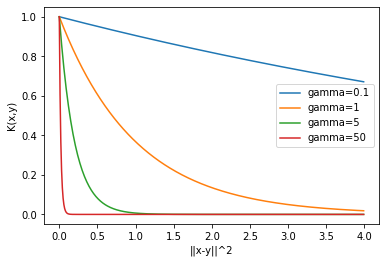

In [2]:
x = np.arange(0,4,0.01)
for gamma in [0.1,1,5,50]:
    y = np.exp(-gamma * x)
    plt.plot(x,y,label=f"gamma={gamma}")
plt.legend()
plt.xlabel("||x-y||^2")
plt.ylabel("K(x,y)")
plt.show()

Recall that a kernelized SVM classifies a data point $\mathbf{x}$ as
$$ \hat{y} = \sum_{i=1}^n \alpha_i K(\mathbf{x}_i,\mathbf{x}), $$
where $\alpha_i$ are the learned coefficients and $\mathbf{x}_i$ are the training points.

For which of the 4 cases have training points far away from $\mathbf{x}$ the most/least impact on the predicted label?

Hence, for a small gamma also coefficients of training points that are relatively far away have an impact on the predicted label, whereas for a large gamma only the training points very close to $\mathbf{x}$ have an impact on the predicted label.

Load Iris flower data set:

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Features:
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

Classes:
- Iris-Setosa
- Iris-Versicolour
- Iris-Virginica

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape,y.shape)
print(Counter(y))

(150, 4) (150,)
Counter({0: 50, 1: 50, 2: 50})


Only consider classes 1,2 only the first two features and set class label 2 to 0

In [4]:
X = X[y != 0, :2]
#X = np.stack((X[y != 0, 0], X[y != 0, 2]),axis=1) 
y = y[y != 0]
y[y == 2] = 0
print(X.shape,y.shape)

(100, 2) (100,)


Randomly shuffle the data

In [5]:
n_sample = len(X)

np.random.seed(1)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

Since some datapoints lie exactly on top of each other despite having different labels we shift the data points of one class and add some noise so that every data point can be observed in the plot. This is not something to be done in practice and we do this only to make this example more instructive.

In [6]:
X[y==0] += np.array([-0.3, 0.4]) 
X = X+np.random.randn(X.shape[0],X.shape[1])*0.3

Split data into 90% train and 10% test data

In [7]:
X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]
print(X_train.shape,X_test.shape)

(90, 2) (10, 2)


Visualize the data

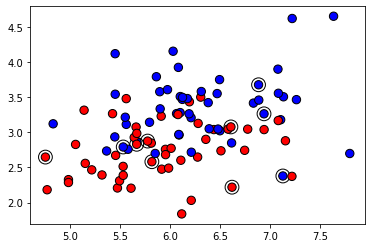

In [8]:
plt.figure()
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=50, cmap=plt.cm.bwr,
            edgecolor='k', s=70)

# Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=190, facecolors='none',
            zorder=10, edgecolor='k')
plt.show()

1. Can we apply a hard-margin SVM to this problem? Why?
2. Do you think there is a classifier that achieves 100% accuracy on this specific train/test split? Why?

In [9]:
def fit_svm(kernel, gamma=1, C=1):
    clf = svm.SVC(kernel=kernel, gamma=gamma, C=C)
    clf.fit(X_train, y_train)
    
    y_hat_train = (clf.decision_function(X_train) >= 0).astype(int)
    correct_train = np.sum(y_hat_train == y_train)
    y_hat_test = (clf.decision_function(X_test) >= 0).astype(int)
    correct_test = np.sum(y_hat_test == y_test)
    print(f"Train accuracy: {correct_train}/{y_train.shape[0]} = {correct_train/y_train.shape[0]}, test accuracy: {correct_test}/{y_test.shape[0]} = {correct_test/y_test.shape[0]}")

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.bwr,
                edgecolor='k', s=70)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=190, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    # create a grid of value paris (x1,x2) in the 2d-x-plance
    x1_min = X[:, 0].min()
    x1_max = X[:, 0].max()
    x2_min = X[:, 1].min()
    x2_max = X[:, 1].max()

    X1, X2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
    Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(X1.shape)
    plt.pcolormesh(X1, X2, Z, cmap=plt.cm.bwr, shading='auto')
    #plt.contour(X1, X2, Z, colors=['k', 'k', 'k'],
    #            linestyles=['--', '-', '--'], levels=[-0.05, 0, 0.05])
    #plt.contour(X1, X2, Z, colors=['k'],
    #            linestyles=['-'], levels=[0])
    plt.colorbar()

    plt.title(kernel)
    plt.show()

**Gamma defines how far the influence of a single training example reaches with low values meaning "far" and high values meaning "close".**

What kind of decision boundary would you expect for a small gamma=0.1?

Train accuracy: 65/90 = 0.7222222222222222, test accuracy: 7/10 = 0.7


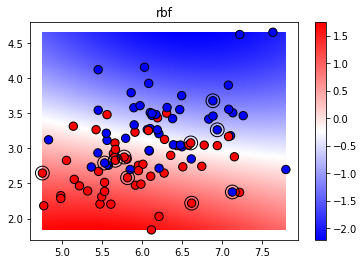

In [10]:
fit_svm(kernel="rbf", gamma=0.1)

What kind of decision boundary would you expect for a medium size gamma=10? 

Do you expect the training/test accuracy to increase or decrease?

Train accuracy: 75/90 = 0.8333333333333334, test accuracy: 9/10 = 0.9


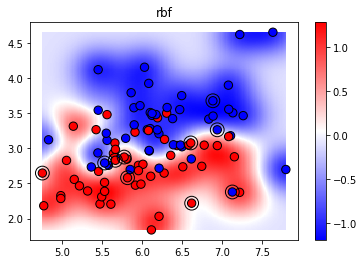

In [11]:
fit_svm(kernel="rbf", gamma=10, C=1)

What kind of decision boundary would you expect for a large gamma=100?

Do you expect the training/test accuracy to increase or decrease?

Train accuracy: 87/90 = 0.9666666666666667, test accuracy: 5/10 = 0.5


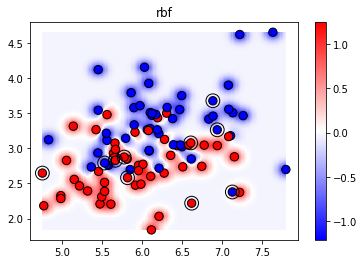

In [12]:
fit_svm(kernel="rbf", gamma=100, C=1)

Can we already make a final conclusion on which of the three settings works best?

In [13]:
param_grid = {"gamma":[0.1,10,100]}
cv = KFold(n_splits=100)
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(X, y)
print(grid.cv_results_['params'])
grid.cv_results_['mean_test_score']

[{'gamma': 0.1}, {'gamma': 10}, {'gamma': 100}]


array([0.71, 0.64, 0.47])